# SVM Demonstration

<p><a name="sections"></a></p>


## Sections

- <a href="#svm">Support Vector Machine</a><br>
- <a href="#svm-example">SVM Example</a><br>
- <a href="#svm-sklearn">SVM in Scikit Learn</a><br>
 - <a href="#1caes1">Case 1: Binary Classification</a><br>
 - <a href="#1caes2">Case 2: Multiclass Classification</a><br>
 - <a href="#1caes3">Case 3: Grid Search</a><br>

<p><a name="svm"></a></p>

## Support Vector Machines

- Support vector machines (SVMs) are supervised learning methods used for classification analysis. (Remember that SVM can be used for a regression problem but it is originally an extension version of perceptron.)

- Unlike linear discriminant analysis or logistic regression, SVMs approach the two-class classification problem in a direct way: construct linear decision boundaries, by explicitly separating the data in two different classes as well as possible.

- The decision boundaries are called **hyperplanes** in the feature space.

### Hyperplanes

A hyperplane of a *p-dimensional* space *V* is a subspace of dimension *p-1*.

- A hyperplane can be described with a single linear equation of the form (in Cartesian coordinates):

$$w_0 + w_1 X_1 + ... + w_p X_p = 0$$

  - It is more convenient to be written in the matrix form $w_0 + w^T X = 0$, where $w = (w_1, ... w_p)$ and $X = (X_1, ... X_p)$ are *p-dimensional* vectors.
  
  - In a 2-dimensional space, a hyperplane is a line and in a 3-dimensional space it is a plane.


- The coefficient vector $\vec{w}$ is the **normal vector** - a vector orthogonal to the surface of that hyperplane.

- In some cases we need to work with the normalized form: $w^* = w / \lvert w \rvert$, or equivalently, to require that $\sum_i^p w_i^2 = 1$

Some properties:

- For any point $x_0$ in the hyperplane, $w^T x_0 = -w_0$

- For any two points $x_1$ and $x_2$ lying in the hyperplane, we always have $w^T (x_1 - x_2) = 0$, that is, the normal vector $w$ is perpendicular to any vectors within the hyperplane.

- The signed distance of any point $x$ to the hyperplane is given by:

$$f(x) = \frac{1}{\lvert w \rvert}(w^T x + w_0)$$

### Separating Hyperplanes

- If we assume that the data can be well separated by a hyperplane defined by $f(X) = w_0 + w^T X = 0$, then:

  - $f(X) > 0$, for points on one side of the hyperplane,
  - $f(X) < 0$, for points on the other side.

- We coded the two classes as:

  - $y = 1$, for $f(X) > 0$
  - $y = -1$, for $f(X) < 0$

- The distances times the classes become positive: $y_i \cdot f(X_i) > 0$

### Optimal Separating Hyperplanes

- The goal is to **maximize** the margin, defined by the distance from the data point to a hyperplane,  between the two classes on the training data.

- The data points that are used to determine the margins are called **support vectors**.

### Maximal Margin Classifier

The optimal separating hyperplane leads to a constrained optimization problem:

$$\underset{w_0, \lvert w \rvert = 1}{\mathrm{max}} M$$
$$\mathrm{subject\, to}\quad y_i(x_i^T w + w_0) \geq M, i = 1, ..., N$$

The set of conditions ensure that the distances from all the points to the decision boundary defined by $w$ and $w_0$ are at least $M$, and we seek the largest $M$ by varying the parameters.

We can get rid of the constraint $\lvert w \rvert = 1$ by replacing the condition with:

$$y_i(x_i^T w + w_0) \geq M \lvert w \rvert$$

For any $w$ and $w_0$ satisfying the inequalities, any positively scaled multiple satisfies them too. If we set $\lvert w \rvert = 1/M$, we can rephrase the problem to a more convenient form by dropping the norm constraint on $w$:

$$\underset{w_0, w}{\mathrm{min}} \frac{1}{2}\lvert w \rvert^2$$

$$\mathrm{subject\, to}\quad y_i(x_i^T w + w_0) \geq 1$$

This is a convex quadratic problem, and can be solved efficiently.


### Noisy Data

- The technique for constructing an optimal separating hyperplane can be applied to cases of two perfectly separated classes.

- However, sometimes the data can be noisy, which can lead to a poor solution for the maximal margin classifier.

### Non-separable Data

- Even worse, quite often the data is not separable by a linear boundary.

- What shall we do?

### The Support Vector Classifier

- To tolerate noise and errors, we still maximize M but meanwhile allow some points to be on the wrong side of the hyperplane.

- We introduce “slack” variables $\epsilon = (\epsilon_1, ... \epsilon_N)$ with $\epsilon_i \geq 0$ and $\sum_i \epsilon_i \leq \mathrm{Const}$, and modify the optimization problem to be:

$$\underset{w_0, \epsilon, \lvert w \rvert = 1}{\mathrm{max}} M$$
$$\mathrm{subject\,to}\quad
\begin{cases}
y_i(x_i^T w + w_0) \geq M (1 - \epsilon_i)
\\
\epsilon_i \geq 0 \mathrm{, and } \sum_i \epsilon_i \leq \mathrm{Const}
\end{cases}
$$

- $\epsilon_i$ are proportional to the amount by which the prediction is on the wrong side of their margin. 
- Misclassifications occur when $\epsilon_i > 1$. So given that the constraint $\sum \epsilon_i = \mathrm{Const}$, the total number of misclassifications will be bounded by $\mathrm{Const}$.

- The effect of the data points that fall into the margin will be penalized by the slack variable $\epsilon$.


Computationally it's convenient to use the form:

$$
\underset{w_0, w}{\mathrm{min}} \big( \frac{1}{2} \lvert w \rvert^2 + C \sum_{i=1}^N \epsilon_i \big)
$$

$$
\mathrm{ subject to }\quad
\begin{cases}
y_i(x_i^T w + w_0) \geq 1 - \epsilon_i
\\
\epsilon_i \geq 0
\end{cases}
$$

where $C$ is the penalty parameter of the error term.

- If $C$ is close to 0 then we have a wide, soft margin.

- If $C$ is large then we are close to the hard-margin formulation.

### Beyond Linearity

The support vector classifier described so far finds linear boundaries in the feature space.

In reality, it's very unlikely that the true boundary is actually linear in $X$.

If a linear boundary fails, we need to move beyond linearity. 

The core idea is to enlarge the features $X$ using basis expansions such as polynomials, and then use linear models in the enlarged space of derived input features, and translate to nonlinear boundaries in the original space.

Example: 
- We enlarge the feature space $(X_1, X_2)$ to $(X_1, X_2, X_1^2, X_2^2, X_1X_2)$
- The boundary is then a hyperplane in *5-dimensional* space determined by:
$$
w_0 + w_1 X_1 + w_2 X_2, + w_3 X_1^2 + w_4 X_1 X_2 + w_4 X_2^2 = 0
$$

*Examples*

### Kernels

- In general, the idea for nonlinearity is to map the feature X to a high dimensional space by some mapping functions $h(x)$.

- Notice that only the inner-products of the input vectors play a role in the optimization problem (the proof of this requires to derive a so called Lagrangian dual function which is beyond the scope of this course).

- A more elegant and controlled way to have nonlinear boundaries is to use kernels.

- We first introduce the notation for inner product of two vectors:

$$\left \langle x, x^\prime \right \rangle = \sum_{i=1}^p x_i x_i^\prime$$

- It can be mathematically proven that the linear vector classifier can be represented as

$$f(x) = \beta_0 + \sum_{i=1}^N \alpha_i y_i\left \langle x, x_i \right \rangle$$

- where $\alpha_i > 0$ are parameters subject to $0 < \alpha_i < C$. For the data points that are not  support vectors, their $\alpha_i$ are equal to 0.

- Since the support vector classifiers involve the mapping h(X) only through inner products, instead of specifying the transformation, we only need to provide a kernel function

$$K(x, x^\prime) = \left \langle h(x), h(x^\prime) \right \rangle$$

- Some popular choices for kernel functions for SVMs are:

  - *d*th-Degree polynomial: $K(x, x^\prime) = (1+\left \langle x, x^\prime \right \rangle)^d$
  
  - Radial basis: $K(x, x^\prime) = \exp(-\gamma \lvert x - x^\prime \rvert)^2$
  
  
$$f(x) = \beta_0 + \sum_{i=1}^N \alpha_i y_i K(x, x_i)$$

<p><a name="svm-example"></a></p>

## SVM Example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
X = pd.DataFrame({'X1':[1,2,3,2,3,4],'X2':[2,3,4.9,1,2,3.9],'Y':[1,1,1,-1,-1,-1]})


In [2]:
import numpy as np
Wp = 2
x1 = np.arange(1,4.5,0.5)
x2p = Wp*x1-1.667
x2p

array([0.333, 1.333, 2.333, 3.333, 4.333, 5.333, 6.333])

In [3]:
Wsvm1 = np.dot(X['Y'],X['X1'])
Wsvm2 = np.dot(X['Y'],X['X2'])
Ysvm = Wsvm1*X['X1']+Wsvm2*X['X2']
bsvm = np.sum(X['Y'][0:3]-Ysvm[0:3])/6
print(f'y={Wsvm1}X1+{Wsvm2}X2{bsvm}')
Wsvm = -Wsvm1/Wsvm2
x2svm = Wsvm*x1-bsvm/Wsvm2
print(f'X2={Wsvm}X1+{-bsvm/Wsvm2}')

y=-3X1+3.0000000000000004X2-1.450000000000001
X2=0.9999999999999999X1+0.4833333333333336


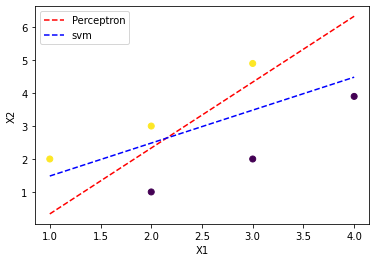

In [4]:
plt.scatter(X['X1'],X['X2'],c=X['Y'])
plt.plot(x1,x2p,linestyle='--',c='red',label='Perceptron')
plt.plot(x1,x2svm,linestyle='--',c='blue',label='svm')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

<p><a name="svm-sklearn"></a></p>

## SVM in Scikit Learn

- In order to implement SVM in python, import **svm** module from sklearn library.


In [5]:
%matplotlib inline
from sklearn import svm
svm_model = svm.SVC(kernel='poly', C=1e5, degree=1)
svm_model

SVC(C=100000.0, degree=1, kernel='poly')

- Here we choose the 'poly' kernel, and set the degree equals to 1, which means a linear boundary.
- $C=1e5$ is used to decrease the effect of the error term.

### Kernels

These are the kernels that sklearn offers:

- **linear**: $<x_1, x_2>$.
- **polynomial**: $(\gamma <x_1, x_2> + r)^d$. $d$ is specified by the argument `degree`, $r$ by `coef0`.
- **rbf**: $\exp(-\gamma \parallel x_1-x_2 \parallel^2)$. $\gamma$ is specified by the argument `gamma`, must be greater than 0.
- **sigmoid**: $(\tanh(\gamma <x_1,x_2> + r))$, where $r$ is specified by `coef0`.

The linear kernel is the original feature space. In terms of the polynomial kernel, it's equivalent to linear kernel when $\gamma=1$ and $r=0$.

### Arguments:

- **kernel**: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given, it is used to precompute the kernel matrix.

- **C**: Penalty parameter of the error term. $C=1$ by default.

- **degree**: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

### Methods:

- **fit**: Fit the SVM model according to the given training data.
- **score**: Return the mean accuracy on the given test data and labels.
- **predict**: Perform classification on samples in X.
- **set_params**: Set the parameters of this estimator.
- **get_params**: Get the parameters of this estimator.

### Attributes:

- **support\_**: return the index of the support vectors.
- **n\_support\_**: return the number of support vectors.
- **support\_vectors\_**: return the value of support vectors.
- **dual\_coef\_**: return the Lagragian multiplier $\alpha\times$Label in array.

<p><a name="1case1"></a></p>

### Case 1: Binary Classification

We demonstrate the `svm` model on the first 100 observation of the iris data, which include two species. For the additional information, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [6]:
import numpy as np
from sklearn import datasets
## prepare data
iris = datasets.load_iris()
index = range(100)
iris.x = iris.data[index, :]
iris.y = iris.target[index]
## fit
svm_model.fit(iris.x[:, 0:2], iris.y)

SVC(C=100000.0, degree=1, kernel='poly')

In [7]:
svm_model.score(iris.x[:,0:2], iris.y)

1.0

In [8]:
svm_model.n_support_

array([2, 2], dtype=int32)

In [9]:
svm_index = svm_model.support_ # index of support vector
print('Index of support vector: ' + str(svm_index))

Index of support vector: [36 41 57 84]


In [10]:
## There are two support vectors in each class.

support = svm_model.support_vectors_ # value of support vector
print(support)

[[5.5 3.5]
 [4.5 2.3]
 [4.9 2.4]
 [5.4 3. ]]


In [11]:
iris.x[svm_model.support_, 0:2] # equivalent to svm_model.support_vectors_

array([[5.5, 3.5],
       [4.5, 2.3],
       [4.9, 2.4],
       [5.4, 3. ]])

As a Lagragian multiplier $\alpha$ is a positive, it is $\alpha=$`np.abs(svm_model.dual_coef_)`. You can find `alpha` directly using `dual_coef_`. In other words, `svm_model.dual_coef_[i] = labels[i] * alphas[i]`. 

In [12]:
svm_model.dual_coef_

array([[-50.55643141, -65.94810692,  65.04641746,  51.45812087]])

In [13]:
def plot_model(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should arrays
    label: true label
    '''
    margin = 0.5
    x_min = x.min() - margin
    x_max = x.max() + margin
    y_min = y.min() - margin
    y_max = y.max() + margin
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    col_dict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', col_dict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, nx),
        np.linspace(y_min, y_max, ny)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label, edgecolors='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    ## if it's a SVM model
    if hasattr(model, 'support_'):
        # if it's a SVC, plot the support vectors
        index = model.support_
        plt.scatter(x[index], y[index], c=label[index], s=200, alpha=0.33, edgecolors='k')

/var/folders/2k/17c70v1d3w93mfqfd0k844x00000gn/T/ipykernel_40295/4100117509.py:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')


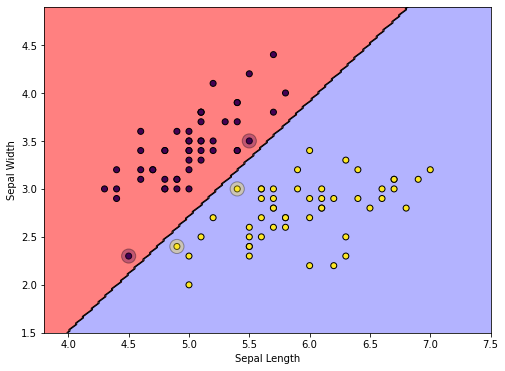

In [14]:
import  matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 6
svm_model.fit(iris.data[index, 0:2], iris.target[index])
plot_model(svm_model, iris.data[index, 0], iris.data[index, 1], iris.target[index])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

#### Change the Degree

This time we set *degree=3*, which result in a cubic boundary:

/var/folders/2k/17c70v1d3w93mfqfd0k844x00000gn/T/ipykernel_40295/4100117509.py:20: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap=cmap)
/var/folders/2k/17c70v1d3w93mfqfd0k844x00000gn/T/ipykernel_40295/4100117509.py:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')


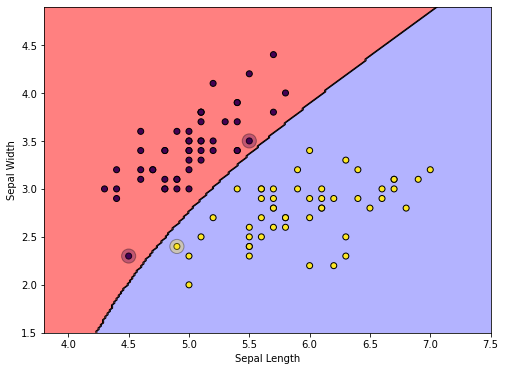

In [15]:
svm_model.set_params(degree=3)
svm_model.fit(iris.data[index, 0:2], iris.target[index])
plot_model(svm_model, iris.data[index, 0], iris.data[index, 1], iris.target[index])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


- Compute the accuracy.

In [16]:
svm_model.score(iris.data[index, 0:2], iris.target[index])

1.0

- Find out all the support vectors.

In [17]:
svm_model.support_vectors_

array([[5.5, 3.5],
       [4.5, 2.3],
       [4.9, 2.4]])

- Which classes do they belong to?

In [18]:
svm_model.predict(svm_model.support_vectors_)

array([0, 0, 1])

<p><a name="1case2"></a></p>

### Case 2: Multiclass Classification

- In cases of multiclass classification problem, **SVC** implement a *one vs one* approach.

- If there are $k$ different classes in total, then $\frac{k(k-1)}{2}$ classifiers are constructed.

For instance, 3 classes 0, 1 and 2 will result in 3 classifiers:

- class 0 VS class 1
- class 0 VS class 2
- class 1 VS class 2



This time we use all the observations in the iris data to build a multiclass classifier. And we choose the last two features "petal length" and "petal width".

In [19]:
svm_model.set_params(degree=1) # reset degree to 1 to build a linear classifier
svm_model.fit(iris.data[:, 2:4], iris.target) # fit on all the observations
svm_model.score(iris.data[:, 2:4], iris.target) # accuracy

0.96

In [20]:
svm_model.predict([[1, 4]])

array([0])

/var/folders/2k/17c70v1d3w93mfqfd0k844x00000gn/T/ipykernel_40295/4100117509.py:20: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap=cmap)


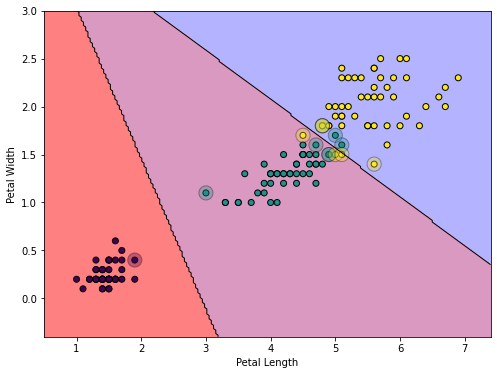

In [21]:
plot_model(svm_model, iris.data[:, 2], iris.data[:, 3], iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

Predict the following observations with the model we created and then confirm the result with the visualization in the previous slide.
- petal length: 1.5, petal width: 0.5
- petal length: 4.0, petal width: 0.5
- petal length: 6.0, petal width: 2.5

In [22]:
svm_model.predict([[1.5, 0.5], [4.0, 0.5], [6.0, 2.5]])

array([0, 1, 2])

Below we change to a different constant `C` (reset `C = 1` from `C=1e5` to decrease the effect of penalty)

In [23]:
svm_model.set_params(C=1)
svm_model.fit(iris.data[:, 2:4], iris.target) 
svm_model.score(iris.data[:, 2:4], iris.target) 

0.96

/var/folders/2k/17c70v1d3w93mfqfd0k844x00000gn/T/ipykernel_40295/4100117509.py:20: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap=cmap)


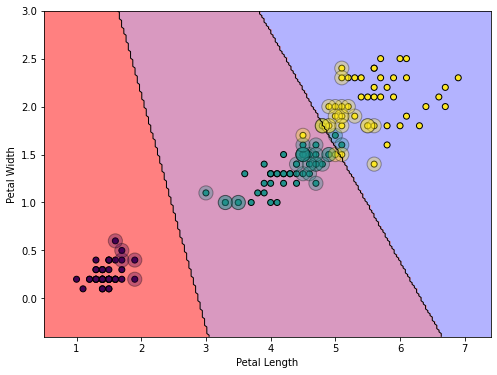

In [24]:
plot_model(svm_model, iris.data[:, 2], iris.data[:, 3], iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

<p><a name="1caes3"></a></p>

### Case 3: Grid Search

There are many parameters to be set in SVM:

- Which kernel.
- The value of $C. \quad$
- The degree in polynomial kernel.

We can use the function **grid_search.GridSearchCV** to select the best combination of parameters. You also can do for other algorithms.
For more information: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [25]:
from sklearn import model_selection
grid_para_svm = [
    {'C': [1, 10, 100, 1000],
     'kernel': ['poly'],
     'degree': [1, 2, 3]},
    {'C': [1, 10, 100, 1000],
     'gamma': [0.001, 0.0001],
     'kernel': ['rbf']}
]

In [26]:
grid_search_svm = model_selection.GridSearchCV(svm_model, grid_para_svm, scoring='accuracy', cv=3, n_jobs=-1)
grid_search_svm.fit(iris.data, iris.target)

GridSearchCV(cv=3, estimator=SVC(C=1, degree=1, kernel='poly'), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'degree': [1, 2, 3],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

Inspect the result of grid search.

In [27]:
print(list(grid_search_svm.cv_results_.keys()))
grid_search_svm.cv_results_

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_degree', 'param_kernel', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']


{'mean_fit_time': array([0.00103116, 0.00102226, 0.00100597, 0.00064246, 0.0003616 ,
        0.00037495, 0.00034467, 0.00038926, 0.00061337, 0.00035397,
        0.00045387, 0.00209578, 0.00114322, 0.00114171, 0.000705  ,
        0.00110825, 0.00045792, 0.00075881, 0.00041326, 0.00048335]),
 'std_fit_time': array([8.85970198e-05, 1.04274873e-04, 5.13312242e-05, 2.01866476e-04,
        1.16416211e-05, 2.09964829e-06, 4.11267250e-06, 2.42440422e-05,
        1.63029540e-04, 1.08898119e-05, 8.49770404e-05, 1.50703653e-03,
        3.30935523e-06, 1.16952083e-05, 1.79083938e-05, 1.43663544e-05,
        5.08129354e-06, 1.46109075e-05, 1.62478758e-05, 1.33192340e-05]),
 'mean_score_time': array([0.00056648, 0.00043964, 0.00042288, 0.00027418, 0.00018239,
        0.00017762, 0.00017897, 0.00017405, 0.00017834, 0.00017071,
        0.00016944, 0.00021235, 0.00070532, 0.00070437, 0.00055536,
        0.00068688, 0.00035826, 0.00060646, 0.00026592, 0.00037114]),
 'std_score_time': array([1.12969321e-

The best combination of parameters is:

In [28]:
grid_search_svm.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [29]:
grid_search_svm.best_score_

0.9933333333333333

In [30]:
## The performance on the original data set is:
grid_search_svm.score(iris.data, iris.target)

0.98

It seems `best_score_` from grid search is better than the score on the whole training data. Does that make sense?

In [31]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lst1 = []
lst2 = []
for i in range(50):
    index = np.random.choice(range(150), size=150, replace=False)
    x = iris.data[index,:]
    y = iris.target[index]
    skf = StratifiedKFold(n_splits=3)
    grid_search_svm = GridSearchCV(svm_model, grid_para_svm, scoring='accuracy', cv=skf)
    grid_search_svm.fit(x, y)
    lst1.append(grid_search_svm.best_score_)
    lst2.append(grid_search_svm.score(x, y))

In [32]:
print(np.mean(lst1))
print(np.mean(lst2))

0.9797333333333333
0.9834666666666666
